<a href="https://colab.research.google.com/github/JazzGoncalves/API_teste/blob/master/trabalhopratico_modulo01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import seaborn as sns
import statsmodels.formula.api as smf

!pip install yfinance --upgrade --no-c


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

ambiguous option: --no-c (--no-cache-dir, --no-clean, --no-color, --no-compile?)


In [ ]:
df = pd.read_csv("frete_dias_entrega.csv", sep=';', encoding='latin-1')


In [ ]:
df.head()

,RegiÃ£o,Valor do Frete,Dias para Entrega
0,Norte,49.59,20.0
1,Norte,117.57,3.0
2,Norte,98.15,7.0
3,Norte,96.98,6.0
4,Norte,123.00,6.0


In [ ]:
dados_sudeste = df[df['RegiÃ£o'] == 'Sudeste']
dados_sudeste

,RegiÃ£o,Valor do Frete,Dias para Entrega
200,Sudeste,106.04,8.0
201,Sudeste,103.51,1.0
202,Sudeste,82.69,13.0
203,Sudeste,108.23,4.0
204,Sudeste,116.11,1.0
...,...,...,...
295,Sudeste,84.04,5.0
296,Sudeste,108.20,4.0
297,Sudeste,96.42,4.0
298,Sudeste,115.34,5.0


In [ ]:
dados_sudeste.describe()

,Valor do Frete,Dias para Entrega
count,100.000000,100.000000
mean,87.186500,8.120000
std,22.707019,5.733615
min,19.170000,1.000000
25%,73.017500,3.750000
50%,89.240000,7.000000
75%,106.190000,12.000000
max,119.570000,26.000000


In [ ]:
dados_sudeste.isna().count()

RegiÃ£o              100
Valor do Frete       100
Dias para Entrega    100
dtype: int64

In [ ]:
dados_sudeste.corr()

<ipython-input-75-a03037937725>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados_sudeste.corr()


,Valor do Frete,Dias para Entrega
Valor do Frete,1.000000,-0.900648
Dias para Entrega,-0.900648,1.000000


In [ ]:
dados_sudeste.dropna()

,RegiÃ£o,Valor do Frete,Dias para Entrega
200,Sudeste,106.04,8.0
201,Sudeste,103.51,1.0
202,Sudeste,82.69,13.0
203,Sudeste,108.23,4.0
204,Sudeste,116.11,1.0
...,...,...,...
295,Sudeste,84.04,5.0
296,Sudeste,108.20,4.0
297,Sudeste,96.42,4.0
298,Sudeste,115.34,5.0


In [ ]:

# Renomea as colunas do data frame

dados_sudeste = dados_sudeste.rename(columns = {'Valor do Frete' : 'vf',
                          'Dias para Entrega' : 'de'})







In [ ]:
# Calcula a regressão simples

regression = smf.ols('vf ~ de', data = dados_sudeste)
regression


In [ ]:

# Resultado da regressão

regression.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     vf   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     421.0
Date:                Sun, 07 May 2023   Prob (F-statistic):           3.00e-37
Time:                        22:07:37   Log-Likelihood:                -370.31
No. Observations:                 100   AIC:                             744.6
Df Residuals:                      98   BIC:                             749.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.1494      1.725     67.326      0.000     112.726     119.573
de            -3.5669      0.174    -20.518      0.000      -3.912      -3.222
==============================================================================
Omnibus:                        7.574   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                3.073
Skew:                           0.014   Prob(JB):                        0.215
Kurtosis:                       2.142   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='vf', ylabel='de'>

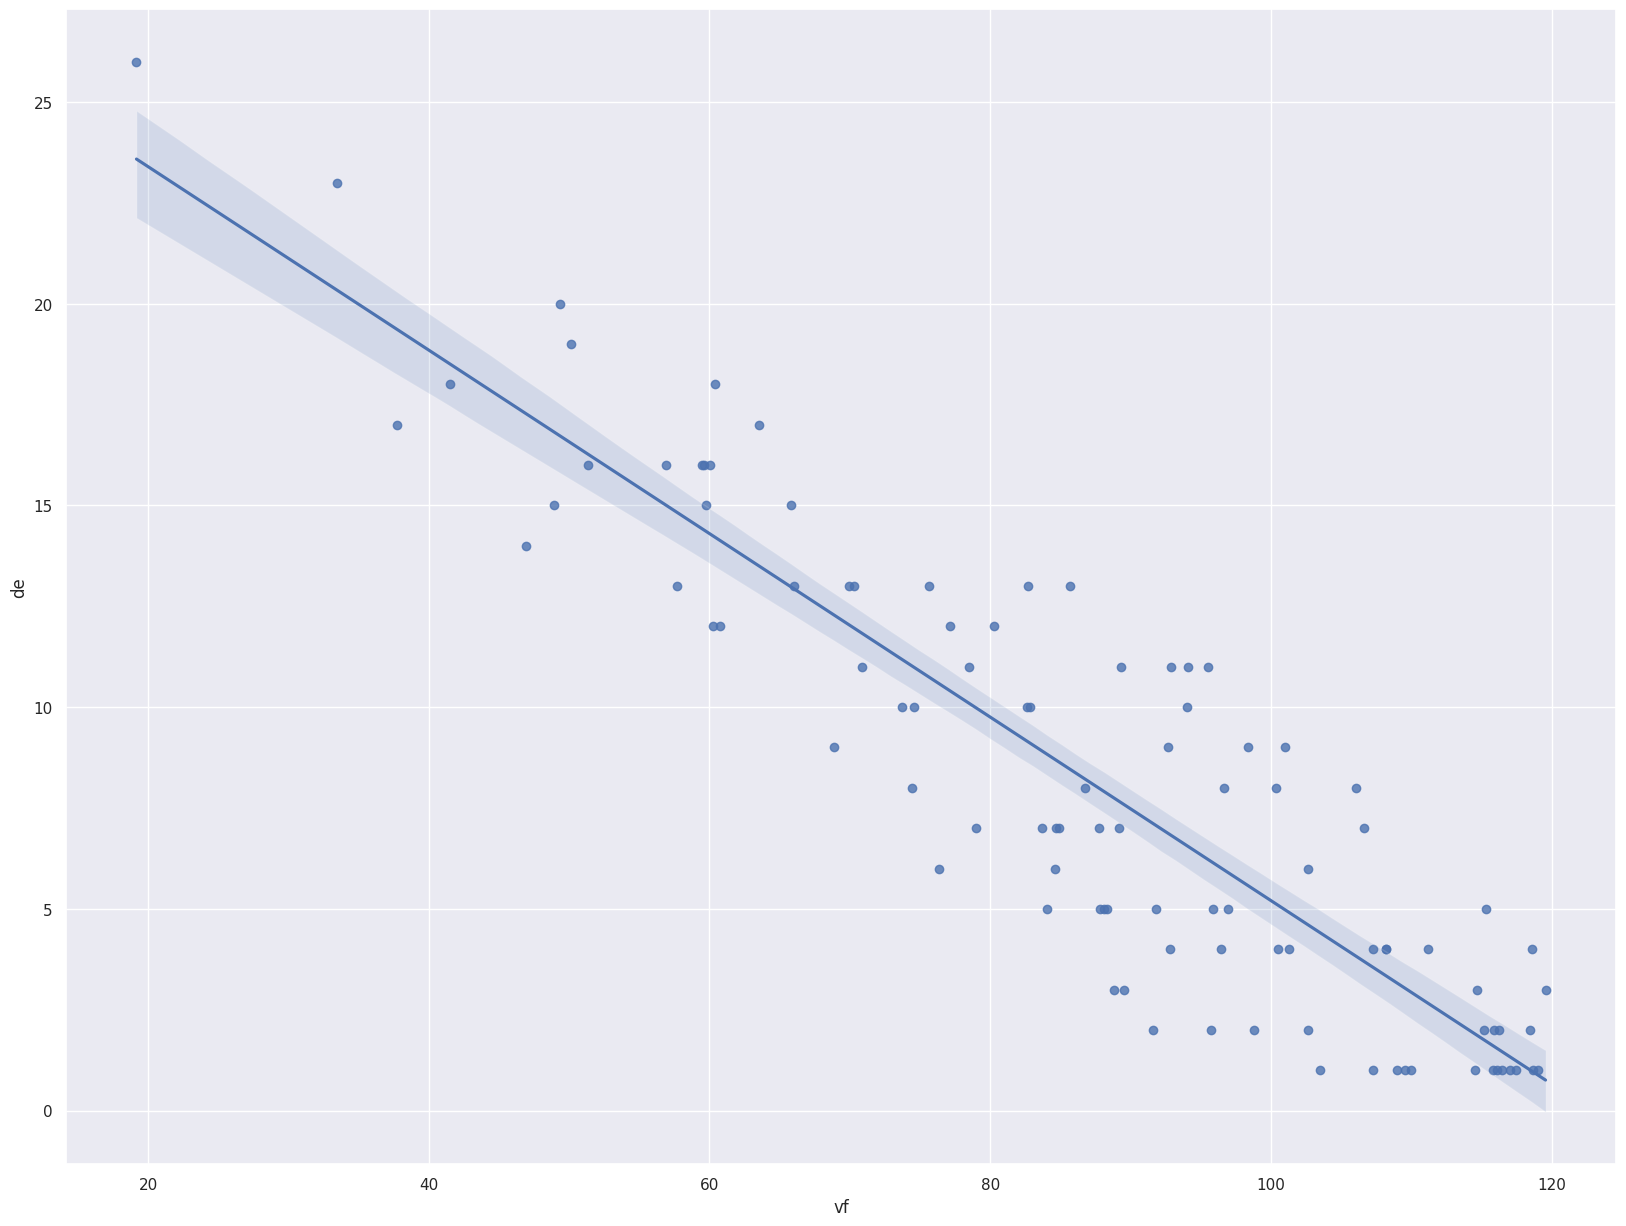

In [ ]:
# Define o tema do gráfico
sns.set_theme()

# Define o tamanho do gráfico
plt.figure(figsize = (20, 15))

# Cria o gráfico de dispersão com a Reta de regressão
sns.regplot(x = 'vf', y = 'de', data = dados_sudeste)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #classificador
dados_sudeste = KNeighborsClassifier()
dados_sudeste.fit(x_treino, y_treino)
resultado_knn = knn.predict(x_teste)

NameError: ignored